<a href="https://colab.research.google.com/github/kanakhan/GMSW/blob/main/BeautifulSoup_Movie_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 네이버 영화 리뷰 웹 크롤링

<웹 크롤링 순서>

1) 웹 페이지(html)에 HTTP 요청( requests.get 모듈 사용)

2) 파싱( BeautifulSoup 모듈 사용): html 태그 및 정보를 가져와 새롭게 구조화

3) 웹 페이지에서 크롤링할 정보 선택

4) 태그(Tag)를 탐색해 크롤링할 부분을 담고 있는 최소 영역 선정

5) find_all, find, select를 이용해 필요한 정보만 선택해서 가져오기

6) 프로그램 일반화(네이버에서 제공하는 모든 영화정보에 적용 등)

#### 네이버 영화 리뷰 크롤링에 필요한 모듈 호출

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

* 네이버 영화 리뷰 페이지에 HTTP 요청을 보낼 requests
* html 태그와 정보를 가져와 파싱(parsing)할 BeautifulSoup
* 데이터프래임(DaraFrame)으로 전환할 판다스(panda) 호출

#### 네이버 영화 리뷰 크롤링할 정보 선택

In [3]:
mcode = 88494
p = 1
url = "https://movie.naver.com/movie/point/af/list.naver?st=mcode&sword=" + str(mcode) + "&page=" + str(p)

* '영화제목', '평점', '감상평(리뷰)'
* 접속할 url

#### 크롤링 할 부분을 담고 있는 태그(tag) 최소 영역 선택

* 태크(tag) 선택과 텍스트 추출

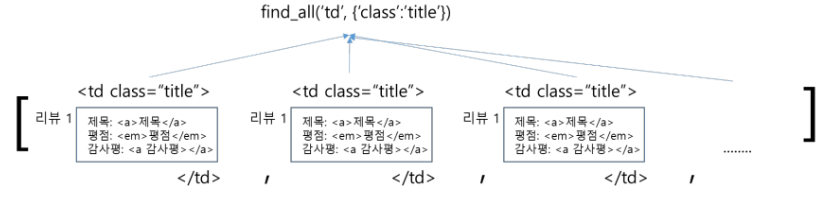

In [ ]:
m_page = requests.get(url)
m_soup = BeautifulSoup(m_page, 'html.parser')

reviews = m_soup.find_all('td', {'class':'title'})

for review in reviews:
  title = review.find('a', {'class' : 'movie color_b'}).get_text()
  score = review.find('em').get_text()
  review_text = review.find('a', {'class': 'report'}).get('onclick').split(',')[2]



* 페이지별 리뷰 추출

In [9]:
def get_movie_reviews(mcode, page_num = 10):
  m_review_df = pd.DataFrame(columns=("Title", "Score", "Review"))
  idx = 0

  for p in range(1, page_num+1):
    url = "https://movie.naver.com/movie/point/af/list.naver?st=mcode&sword=" + str(mcode) + "&target=&page=" + str(p)
    m_page = requests.get(url).text
    m_soup = BeautifulSoup(m_page, 'html.parser')
    reviews = m_soup.find_all('td', {'class':'title'})

    for review in reviews:
      title = review.find('a', {'class' : 'movie color_b'}).get_text()
      score = review.find('em').get_text()
      review_text = review.find('a', {'class': 'report'}).get('onclick').split(',')[2]
      m_review_df.loc[idx] = [title, score, review_text]
      idx += 1
      print("#", end = "")
    page_num += 1

    try:
      url = url = "https://movie.naver.com/movie/point/af/list.naver?st=mcode&sword=" + str(mcode) + "&page=" + str(p)
    except:
      break
  
  return m_review_df


In [10]:
get_movie_reviews(88494, 1)

##########

,Title,Score,Review
0,케이온,1,'씹뜨억하면 화낸다는게 사실인가요?'
1,케이온,10,'케이온을 안봤으면 당장 봐라 인생애니'
2,케이온,10,'이제진짜끝이넹ㅇ유ㅠ'
3,케이온,10,''
4,케이온,10,'1기 2기 정주행후 극장판까지 행복했습니다. 안녕~~케이온~~'
5,케이온,10,'케이온을 좋아한다면 절대 재미없을수 없다.'
6,케이온,10,'음지문화 오덕소리 듣기싫으면 댓글이나 제대로 달아라 새ㄲ들아ㅋㅋ으휴 애니가 저취...
7,케이온,10,'지금 까지 이런 애니는 없었다. 이것은 야니인가 애니 인가…(?)'
8,케이온,6,'돈주고보기에는 아깝다는 생각이든다 재미없다는건 아니다'
9,케이온,10,'모에모에 큥~♡ 다이스키♡♡♡♡ 히라사와 유이 나카노 아즈사 카와이네~ ...


* 추출된 텍스트 데이터 프레임으로 전환

#### 네이버 영화 리뷰 클로링 일반화

## 전체 코드 작성